In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
class Simulator:
    def __init__(self):
        self.x_train, self.y_train = None, None
        self.x_test, self.y_test = None, None
        self.model = None
    
    def generate_train(self, n, p):
        self._generate_data(n, p)
        self._train()
    
    def _generate_data(self,n, p):
        self.x_train = np.random.rand(n, p)
        self.y_train = np.random.rand(n, 1)
        self.x_test = np.random.rand(n, p)
        self.y_test = np.random.rand(n, 1)
        
    def _train(self):
        self.model = linear_model.LinearRegression()
        self.model.fit(self.x_train ,self.y_train)
        
    def evalute_train_test(self):
        mae_train, pcc_train = self._evaluate(self.x_train, self.y_train)
        mae_test, pcc_test = self._evaluate(self.x_test, self.y_test)
        return mae_train, pcc_train, mae_test, pcc_test
    
    def _evaluate(self,x, y):
        y_hat = self.model.predict(x)
#         plt.scatter(y, y_hat)
#         plt.show()
        pcc = pearsonr(y, y_hat)
        return mean_squared_error(y, y_hat), pcc[0]

In [3]:
simulator = Simulator()

In [4]:
pccs_train, pccs_test = [], []

for p in [5e1, 5e2, 5e3, 5e4]:
    simulator.generate_train(n=int(1e5), p = int(p))
    mae_train, pcc_train, mae_test, pcc_test = simulator.evalute_train_test()
    # print(mae_train, mae_test)
    print(pcc_train, pcc_test)
    pccs_train.append(pcc_train)
    pccs_test.append(pcc_test)

[0.02412743] [-0.00296782]
[0.06779793] [-0.00056491]


MemoryError: 

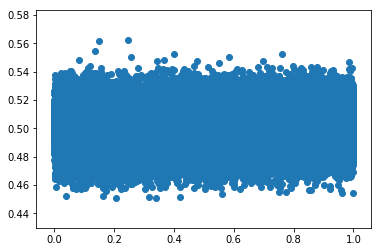

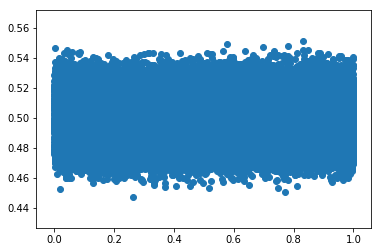

0.24954536599370689 0.2500515923324065
[0.04291009] [-0.00175351]
